# Code to compare the performances of QMPc and QMPb

In [1]:
iterations = 5
xi = 0.01
kind_1 = 'QMPb'
kind_2 = 'QMPc'
step = 0.01
size = 550

In [2]:
names = list()
errors_1 = list()
errors_2 = list()
for i in range(0, iterations, 1):
    names.append('data_dump_' + "{:.2f}".format(xi) +'_'+ kind_1 + '.json')
    errors_1.append(xi)
    xi = xi + step
xi = 0.01
for i in range(0, iterations, 1):
    names.append('data_dump_' + "{:.2f}".format(xi) +'_'+ kind_2 + '.json')
    errors_2.append(xi+step/10)
    xi = xi + step
names

['data_dump_0.01_QMPb.json',
 'data_dump_0.02_QMPb.json',
 'data_dump_0.03_QMPb.json',
 'data_dump_0.04_QMPb.json',
 'data_dump_0.05_QMPb.json',
 'data_dump_0.01_QMPc.json',
 'data_dump_0.02_QMPc.json',
 'data_dump_0.03_QMPc.json',
 'data_dump_0.04_QMPc.json',
 'data_dump_0.05_QMPc.json']

In [3]:
import numpy as np
import json

data = []
c_mean = []
c_std = []
q_mean = []
q_std = []
sim_mean = []
sim_std = []

for i in range(0, 2*iterations, 1):
    with open(names[i]) as f:
        data.append(json.load(f))

    c = list()
    q = list()
    c = list(data[i]["class_k"])
    q = list(data[i]["quant_k"])
    c_mean_sub = []
    c_std_sub = []
    q_mean_sub = []
    q_std_sub = []
    sim_mean_sub = []
    sim_std_sub = []

    for j in range(0, len(c), 1):
        c_mean_sub.append(np.mean(c[j]))
        c_std_sub.append(np.std(c[j]))
        q_mean_sub.append(np.mean(q[j]))
        q_std_sub.append(np.std(q[j]))
        sim_mean_sub.append(q_mean_sub[j]/c_mean_sub[j])
        sim_std_sub.append(q_std_sub[j]/c_std_sub[j])

    c_mean.append(c_mean_sub)
    c_std.append(c_std_sub)
    q_mean.append(q_mean_sub)
    q_std.append(q_std_sub)
    sim_mean.append(sim_mean_sub)
    sim_std.append(sim_std_sub)


In [4]:
c_mean

[[15.59, 29.13, 42.2, 55.4, 68.8, 83.06, 95.1, 109.69, 123.87, 135.8],
 [15.66, 29.55, 42.35, 55.91, 67.58, 81.98, 94.05, 110.6, 123.03, 135.12],
 [16.16, 29.81, 42.77, 55.45, 69.3, 81.93, 95.03, 109.61, 122.09, 134.67],
 [16.01, 29.52, 42.32, 55.61, 67.79, 83.23, 95.27, 110.66, 123.5, 136.32],
 [16.23, 29.09, 42.49, 55.32, 67.78, 83.43, 95.72, 108.99, 123.34, 133.94],
 [15.56, 28.64, 42.05, 55.72, 68.08, 83.34, 95.39, 110.53, 123.63, 136.29],
 [15.82, 29.07, 42.13, 56.05, 68.23, 82.72, 95.33, 109.69, 123.2, 136.21],
 [15.74, 29.59, 42.24, 55.56, 68.66, 82.55, 95.44, 109.84, 122.52, 135.54],
 [15.93, 28.45, 42.41, 56.38, 68.66, 81.7, 96.29, 110.62, 123.04, 135.3],
 [15.94, 28.72, 42.52, 55.71, 68.78, 82.63, 95.08, 110.98, 123.29, 135.86]]

In [5]:
q_mean

[[15.65, 29.13, 42.21, 55.09, 68.88, 83.27, 95.13, 109.69, 124.16, 135.85],
 [15.61, 29.47, 42.56, 55.65, 67.74, 81.93, 93.95, 110.44, 122.86, 135.77],
 [16.22, 29.81, 42.62, 55.67, 69.37, 82.33, 94.92, 110.04, 122.11, 135.15],
 [16.02, 29.55, 42.33, 55.82, 68.31, 83.74, 95.73, 110.3, 123.14, 136.53],
 [16.39, 29.08, 42.27, 55.44, 67.83, 83.73, 95.74, 109.01, 124.01, 135.17],
 [15.51, 28.7, 42.07, 55.53, 68.04, 83.08, 95.32, 110.06, 123.28, 135.66],
 [15.77, 28.99, 41.92, 55.84, 68.23, 82.61, 95.16, 109.09, 122.24, 135.35],
 [15.99, 29.69, 42.09, 54.22, 67.78, 81.49, 95.55, 109.25, 120.09, 134.54],
 [16.36, 28.14, 42.52, 55.52, 67.0, 80.48, 94.64, 107.71, 120.15, 132.2],
 [16.32, 29.06, 41.35, 55.19, 67.53, 79.61, 92.55, 106.32, 118.31, 130.13]]

In [6]:
sim_mean

[[1.0038486209108404,
  1.0,
  1.0002369668246445,
  0.994404332129964,
  1.0011627906976743,
  1.0025282928003851,
  1.0003154574132491,
  1.0,
  1.002341164123678,
  1.0003681885125182],
 [0.9968071519795657,
  0.9972927241962775,
  1.0049586776859505,
  0.9953496691110714,
  1.0023675643681562,
  0.9993900951451574,
  0.9989367357788411,
  0.9985533453887885,
  0.9986182231975941,
  1.0048105387803434],
 [1.0037128712871286,
  1.0,
  0.9964928688332942,
  1.0039675383228133,
  1.0010101010101011,
  1.004882216526303,
  0.9988424707986951,
  1.0039229997263024,
  1.0001638135801458,
  1.003564268211183],
 [1.000624609618988,
  1.0010162601626016,
  1.0002362948960302,
  1.0037762992267578,
  1.0076707478979199,
  1.006127598221795,
  1.0048283824918653,
  0.9967467919754203,
  0.997085020242915,
  1.0015404929577465],
 [1.0098582871226125,
  0.9996562392574767,
  0.9948223111320311,
  1.002169197396963,
  1.0007376807317792,
  1.0035958288385471,
  1.0002089427496865,
  1.00018350307

In [7]:
similarities_1 = list()
deviations_1 = list()
for i in range(0, iterations, 1):
    similarities_1.append(np.mean(sim_mean[i]))
    deviations_1.append(np.std(sim_mean[i]))

similarities_2 = list()
deviations_2 = list()
for i in range(iterations, 2*iterations, 1):
    similarities_2.append(np.mean(sim_mean[i]))
    deviations_2.append(np.std(sim_mean[i]))

In [8]:
errors_2

[0.011, 0.021, 0.031, 0.041, 0.051000000000000004]

<function matplotlib.pyplot.show(close=None, block=None)>

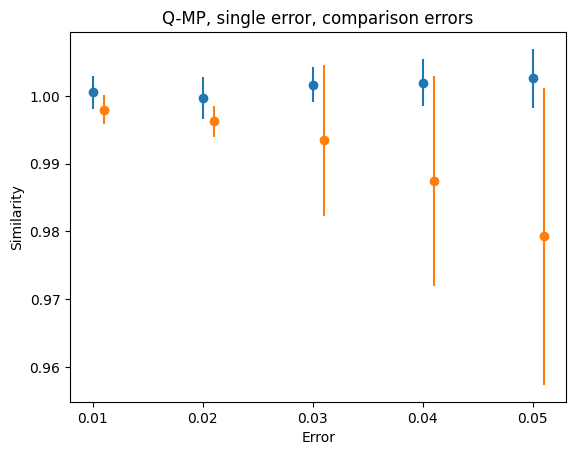

In [9]:
from matplotlib import pyplot as plt

plt.errorbar(errors_1, similarities_1, deviations_1, linestyle='none', marker="o")
plt.errorbar(errors_2, similarities_2, deviations_2, linestyle='none', marker="o")
plt.title("Q-MP, single error, comparison errors")
plt.xlabel("Error")
plt.ylabel("Similarity")
#img_name = 'ev_'+kind +'_' + "{:.2f}".format(xi)+'_' + "{:.2f}".format(step) +'_' + "{:.2f}".format(size) +'_' + "{:.2f}".format(iterations) + '.png'
# 'ev_QOMP_0.01_0.01_550_5.png'
#plt.savefig(img_name, bbox_inches='tight')
plt.show

In [10]:
runtime_b = data[1]['quant_runtime']
runtime_c = data[iterations+1]['quant_runtime']

In [11]:
quant_b_plt = list()
for i in range(0, len(runtime_b), 1):
    quant_b_plt.append(runtime_b[i][0])

In [12]:
quant_c_plt = list()
for i in range(0, len(runtime_c), 1):
    quant_c_plt.append(runtime_c[i][0])

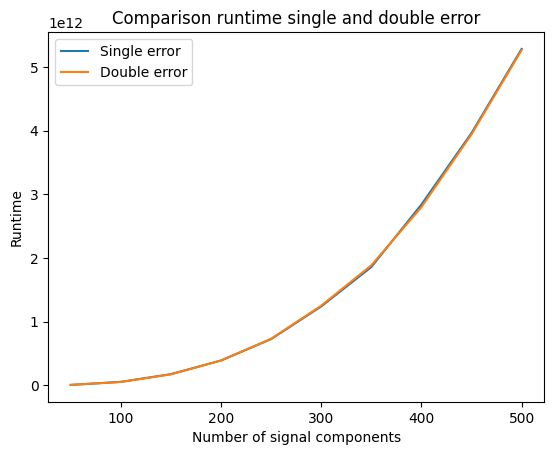

In [13]:
from matplotlib import pyplot as plt

# performano uguale perchè termine polilogaritmico è così alto che oscura la differenza da subito
components = np.arange(50, size, 50)
plt.plot(components, quant_b_plt, label="Single error")
plt.plot(components, quant_c_plt, label="Double error")
plt.title("Comparison runtime single and double error")
plt.xlabel("Number of signal components")
plt.ylabel("Runtime")
plt.legend()
plt.show()